In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [5]:
file3 = "../arabidopsis_sim_data/sim_1507/sim_1507_results_rm5.csv"
df1 = pd.read_csv(file3,sep=",")

begin=1508
end=1808
for i in range(begin,end):
    file3 = "../arabidopsis_sim_data/sim_" + str(i) + "/sim_" + str(i) + "_results_rm5.csv"
    df2 = pd.read_csv(file3,sep=",")
    df1 = pd.concat([df1, df2], axis=0)

df1.reset_index().drop("index",axis=1)

,id,coverage,k-length,metric,score
0,1507,10,10.0,BC,0.175316
1,1507,10,10.0,BF,0.081279
2,1507,10,10.0,CS,0.089644
3,1507,30,10.0,BC,0.121711
4,1507,30,10.0,BF,0.038814
...,...,...,...,...,...
7219,1807,10,40.0,BF,0.339677
7220,1807,10,40.0,CS,0.386733
7221,1807,30,40.0,BC,0.253134
7222,1807,30,40.0,BF,0.155567


In [6]:
info_file = "../arabidopsis_sim_data/sim_1507/sim_info_1507.csv"
info = pd.read_csv(info_file,sep=",")

begin=1508
end=1808
for i in range(begin,end):
    info_file2 = "../arabidopsis_sim_data/sim_" + str(i) + "/sim_info_" + str(i) + ".csv"
    df2 = pd.read_csv(info_file2,sep=",")
    info = pd.concat([info, df2], axis=0)

info.reset_index().drop("index",axis=1)
info

,id,pop,pop_size,generations,sampled individuals,mutation rate,coverage,k-length,average pi
0,1507,0,100,1000,10,0.000010,10,10,0.004118
0,1508,0,100,1000,10,0.000030,10,10,0.011700
0,1509,0,100,1000,10,0.000050,10,10,0.025657
0,1510,0,100,1000,10,0.000100,10,10,0.023856
0,1511,0,100,1000,10,0.000200,10,10,0.031463
...,...,...,...,...,...,...,...,...,...
0,1803,0,100,1000,10,0.000050,10,10,0.020789
0,1804,0,100,1000,10,0.000100,10,10,0.022442
0,1805,0,100,1000,10,0.000200,10,10,0.059616
0,1806,0,100,1000,10,0.000001,10,10,0.000632


In [7]:
pd.merge(df1,info,on='id')

,id,coverage_x,k-length_x,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,coverage_y,k-length_y,average pi
0,1507,10,10.0,BC,0.175316,0,100,1000,10,0.00001,10,10,0.004118
1,1507,10,10.0,BF,0.081279,0,100,1000,10,0.00001,10,10,0.004118
2,1507,10,10.0,CS,0.089644,0,100,1000,10,0.00001,10,10,0.004118
3,1507,30,10.0,BC,0.121711,0,100,1000,10,0.00001,10,10,0.004118
4,1507,30,10.0,BF,0.038814,0,100,1000,10,0.00001,10,10,0.004118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7219,1807,10,40.0,BF,0.339677,0,100,1000,10,0.00001,10,10,0.003812
7220,1807,10,40.0,CS,0.386733,0,100,1000,10,0.00001,10,10,0.003812
7221,1807,30,40.0,BC,0.253134,0,100,1000,10,0.00001,10,10,0.003812
7222,1807,30,40.0,BF,0.155567,0,100,1000,10,0.00001,10,10,0.003812


In [8]:
df = pd.merge(df1,info,on='id').drop(["coverage_y","k-length_y"],axis=1).rename(columns={"coverage_x":"coverage", "k-length_x":"k-length"})

In [9]:
df

,id,coverage,k-length,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,average pi
0,1507,10,10.0,BC,0.175316,0,100,1000,10,0.00001,0.004118
1,1507,10,10.0,BF,0.081279,0,100,1000,10,0.00001,0.004118
2,1507,10,10.0,CS,0.089644,0,100,1000,10,0.00001,0.004118
3,1507,30,10.0,BC,0.121711,0,100,1000,10,0.00001,0.004118
4,1507,30,10.0,BF,0.038814,0,100,1000,10,0.00001,0.004118
...,...,...,...,...,...,...,...,...,...,...,...
7219,1807,10,40.0,BF,0.339677,0,100,1000,10,0.00001,0.003812
7220,1807,10,40.0,CS,0.386733,0,100,1000,10,0.00001,0.003812
7221,1807,30,40.0,BC,0.253134,0,100,1000,10,0.00001,0.003812
7222,1807,30,40.0,BF,0.155567,0,100,1000,10,0.00001,0.003812


In [10]:
# df = df[df[df['average pi'] < 0.001]['score'] > 0.4]
# df[df[df['average pi'] < 0.001]["score"] > .4]

In [11]:
BC = df[df['metric']=='BC']
BF = df[df['metric']=='BF']
# BF2 = df[df['metric']=='BF_Small']
CS = df[df['metric']=='CS']
BF

,id,coverage,k-length,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,average pi
1,1507,10,10.0,BF,0.081279,0,100,1000,10,0.00001,0.004118
4,1507,30,10.0,BF,0.038814,0,100,1000,10,0.00001,0.004118
7,1507,10,20.0,BF,0.182104,0,100,1000,10,0.00001,0.004118
10,1507,30,20.0,BF,0.089212,0,100,1000,10,0.00001,0.004118
13,1507,10,30.0,BF,0.251611,0,100,1000,10,0.00001,0.004118
...,...,...,...,...,...,...,...,...,...,...,...
7210,1807,30,20.0,BF,0.089851,0,100,1000,10,0.00001,0.003812
7213,1807,10,30.0,BF,0.254540,0,100,1000,10,0.00001,0.003812
7216,1807,30,30.0,BF,0.123631,0,100,1000,10,0.00001,0.003812
7219,1807,10,40.0,BF,0.339677,0,100,1000,10,0.00001,0.003812


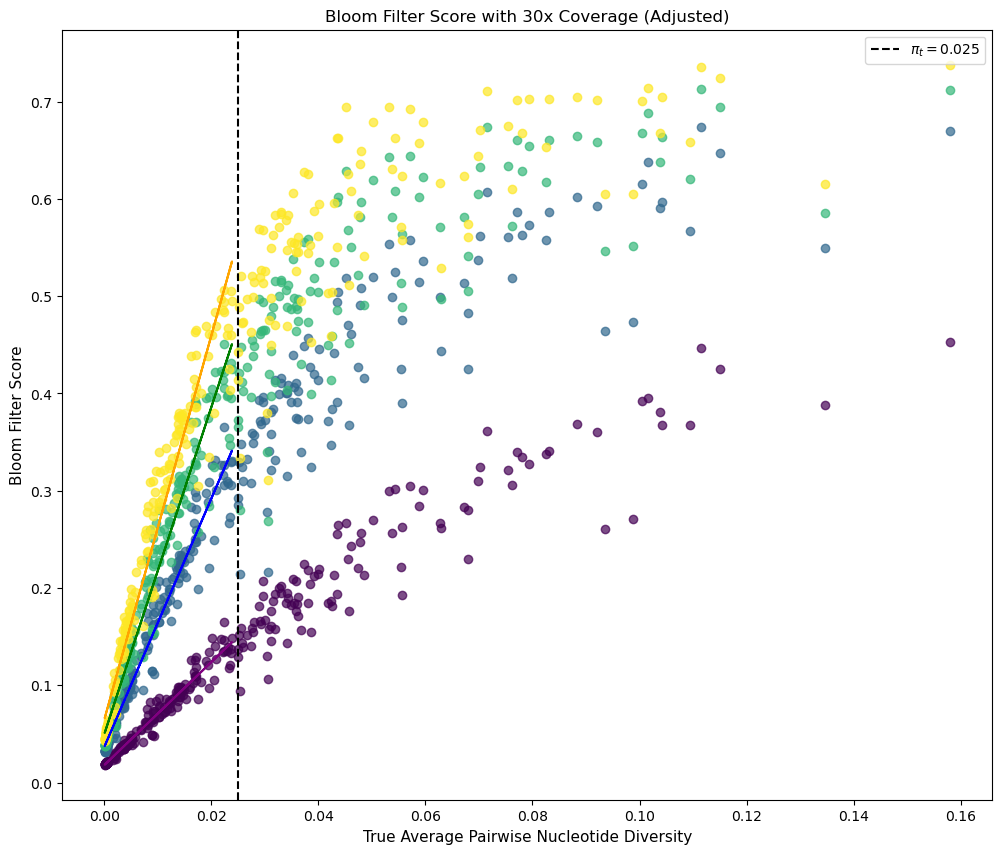

In [12]:
plot_df = BF[BF["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

fig.set_size_inches(w=12,h=10)

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))
color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i])

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

plt.title("Bloom Filter Score with 30x Coverage (Adjusted)")
plt.ylabel("Bloom Filter Score", fontsize=11, color="black")
plt.xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)
else:
    plt.legend()

plt.show()

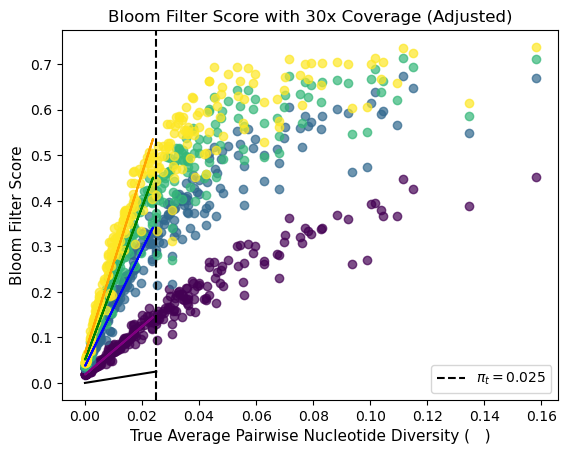

In [13]:
plot_df = BF[BF["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))
color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i])


x=[0,.025]
y=[0,.025]

plt.plot(x,y,"-k")

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

plt.title("Bloom Filter Score with 30x Coverage (Adjusted)")
plt.ylabel("Bloom Filter Score", fontsize=11, color="black")
plt.xlabel("True Average Pairwise Nucleotide Diversity (   )", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)
else:
    plt.legend()

plt.show()

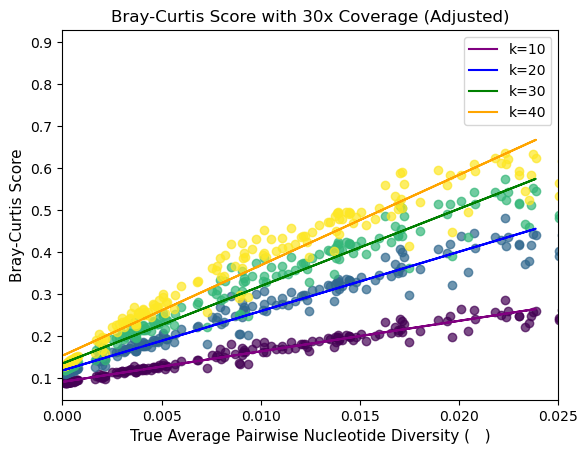

In [14]:
plot_df = BC[BC["coverage"]==30]; ADJUSTED = True

fig, ax = plt.subplots()

num_kmers = 4

k=[10,20,30,40]

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_kmers))
color_1 = ["purple","blue","green","orange"]

for i in range(0,num_kmers):
    kmer_data = plot_df[plot_df['k-length']== k[i]]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i], label="k=" + str(k[i]))

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

if(ADJUSTED):
    plt.title("Bray-Curtis Score with 30x Coverage (Adjusted)")
else:
    plt.title("Bray-Curtis Score with 30x Coverage")
plt.ylabel("Bray-Curtis Score", fontsize=11, color="black")
plt.xlabel("True Average Pairwise Nucleotide Diversity (   )", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)

plt.legend()

plt.show()

[array([0.267004, 0.004874, 0.329415, 1.      ])
 array([0.190631, 0.407061, 0.556089, 1.      ])
 array([0.993248, 0.906157, 0.143936, 1.      ])]
Score: Bray-Curtis Slope: 7.261501605442732 R^2: 0.9660347994653012 Inter: 0.09135236745778706
Score: Cosine Similarity Slope: 5.984092514124409 R^2: 0.9635424890226748 Inter: 0.019815914378174482
Score: Counting Bloom Filter Slope: 5.295759565088086 R^2: 0.9640385816047932 Inter: 0.01803400925969672


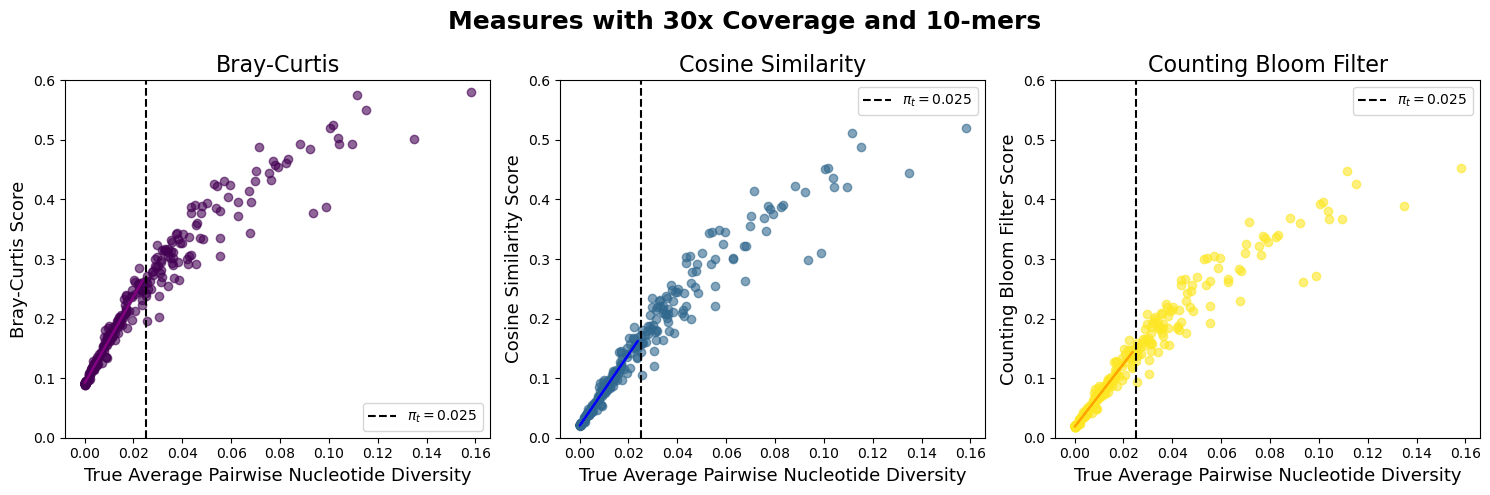

In [15]:
coverage = 30
k_len = 10

df1 = BC[BC["coverage"]==coverage]
df1 = df1[df1["k-length"]==k_len]
df2 = CS[CS["coverage"]==coverage]
df2 = df2[df2["k-length"]==k_len]
df3 = BF[BF["coverage"]==coverage]
df3 = df3[df3["k-length"]==k_len]

num_plots = 4

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_plots))
color_1 = ["purple","blue","orange"]
score = ["Bray-Curtis","Cosine Similarity", "Counting Bloom Filter"]

colors = np.array([0,0,0], dtype=object)
colors[0] = viridis_colors[0]
colors[1] = viridis_colors[1]
colors[2] = viridis_colors[3]

print(colors)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each subplot
for i, df in enumerate([df1, df2, df3]):
    ax = axes[i]
    ax.scatter(df["average pi"],df["score"],color=colors[i],label=None,alpha=0.6)

    x = np.array(df['average pi']).reshape(-1, 1)
    sub_df2 = df[df["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    # Calculate R^2 value
    r2 = r2_score(y, reg.predict(X))
    # Get slope
    slope = reg.coef_[0]

    inter = reg.intercept_

    print("Score: " + score[i] + " Slope: " + str(slope) + " R^2: " + str(r2) + " Inter: " + str(inter))

    ax.plot(X, reg.predict(X), color=color_1[i])
    ax.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

    ax.set_title(score[i] + "",fontsize=16)
    ax.set_xlabel("True Average Pairwise Nucleotide Diversity",fontsize=13)
    ax.set_ylabel(score[i] + " Score",fontsize=13)
    ax.set_ylim(0, 0.6)
    ax.legend()

# Share y-axis among subplots
fig.suptitle("Measures with " + str(coverage) + "x Coverage and " + str(k_len) + "-mers",fontsize=18, fontweight='bold')
plt.tight_layout()
# plt.legend()
plt.show()

[array([0.267004, 0.004874, 0.329415, 1.      ])
 array([0.127568, 0.566949, 0.550556, 1.      ])
 array([0.993248, 0.906157, 0.143936, 1.      ])]
Score: Bray-Curtis Slope: 7.261501605442732 R^2: 0.9660347994653012 Inter: 0.09135236745778706
Score: Cosine Similarity Slope: 5.984092514124409 R^2: 0.9635424890226748 Inter: 0.019815914378174482
Score: Counting Bloom Filter Slope: 5.295759565088086 R^2: 0.9640385816047932 Inter: 0.01803400925969672


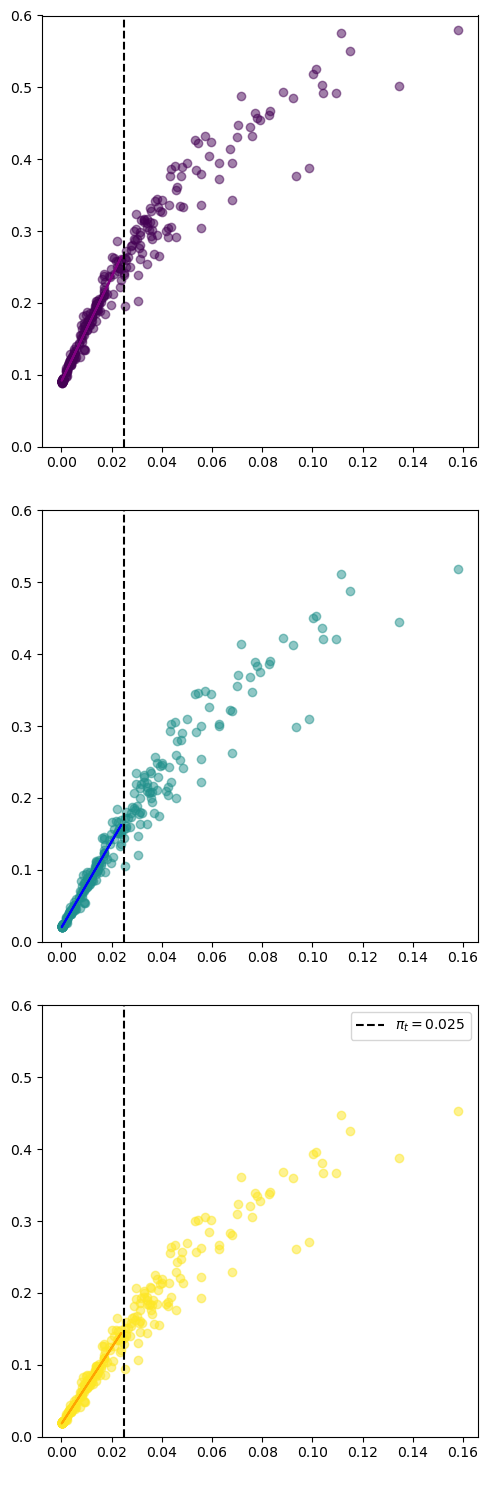

In [16]:
coverage = 30
k_len = 10

df1 = BC[BC["coverage"]==coverage]
df1 = df1[df1["k-length"]==k_len]
df2 = CS[CS["coverage"]==coverage]
df2 = df2[df2["k-length"]==k_len]
df3 = BF[BF["coverage"]==coverage]
df3 = df3[df3["k-length"]==k_len]

num_plots = 3

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_plots))
color_1 = ["purple","blue","orange"]
score = ["Bray-Curtis","Cosine Similarity", "Counting Bloom Filter"]

colors = np.array([0,0,0], dtype=object)
colors[0] = viridis_colors[0]
colors[1] = viridis_colors[1]
colors[2] = viridis_colors[2]

print(colors)

# Create subplots
# fig = plt.subplots(figsize=(10, 5))
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Loop through each subplot
for i, df in enumerate([df1, df2, df3]):
    ax = axes[i]
    ax.scatter(df["average pi"],df["score"],color=colors[i],label=None,alpha=0.5)

    x = np.array(df['average pi']).reshape(-1, 1)
    sub_df2 = df[df["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    # Calculate R^2 value
    r2 = r2_score(y, reg.predict(X))
    # Get slope
    slope = reg.coef_[0]

    inter = reg.intercept_

    print("Score: " + score[i] + " Slope: " + str(slope) + " R^2: " + str(r2) + " Inter: " + str(inter))

    ax.plot(X, reg.predict(X), color=color_1[i])
    ax.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

    # ax.set_title(score[i] + "",fontsize=16)
    # if(i==2):
        # ax.set_xlabel("True Average Pairwise Nucleotide Diversity",fontsize=12)
    ax.set_xlabel(" ")
    # ax.set_ylabel(score[i] + " Score",fontsize=12)
    ax.set_ylim(0, 0.6)
    if(i==2):
        ax.legend()

# Share y-axis among subplots
# fig.suptitle("Measures with " + str(coverage) + "x Coverage and " + str(k_len) + "-mers",fontsize=18, fontweight='bold')
plt.tight_layout()
# plt.legend()
plt.show()